## Kostenfunktion
$$r_i((m_x, m_y, r)^T)=\sqrt{(x_i-m_x)^2+(y_i-m_y)^2}-r$$

## Partielle Ableitungen
$$\frac{\partial r_i}{\partial m_x}=\frac{x_i-m_x}{\sqrt{(m_x-x_i)^2+(m_y-y_i)^2}}$$
$$\frac{\partial r_i}{\partial m_y}=\frac{y_i-m_y}{\sqrt{(m_x-x_i)^2+(m_y-y_i)^2}}$$
$$\frac{\partial r_i}{\partial r}=-1$$

In [1]:
import numpy as np

def calc_jacobian_and_residuals(points, theta):
    mx, my, r = theta
    x = points[0]
    y = points[1]
    M = len(x)

    distances = np.sqrt((x - mx)**2 + (y - my)**2)
    r_vec = distances - r

    J = np.zeros((M, 3))
    for i in range(M):
        dx = x[i] - mx
        dy = y[i] - my
        dist = distances[i]

        if dist != 0:
            J[i, 0] = -dx / dist
            J[i, 1] = -dy / dist
        else:
            J[i, 0] = J[i, 1] = 0
        J[i, 2] = -1

    return J, r_vec

In [2]:
def least_squares_minimization(points, theta_0, max_iter=100, tolerance=1e-6):
    theta = np.array(theta_0)
    theta_history = [theta]
    residual_history = []

    for i in range(max_iter):
        J, r_vec = calc_jacobian_and_residuals(points, theta)
        d, _, _, _ = np.linalg.lstsq(J, -r_vec, rcond=None)
        theta += d
        residual_norm = np.linalg.norm(r_vec)
        residual_history.append(residual_norm)
        theta_history.append(theta)

        if np.linalg.norm(d) < tolerance:
            print(f"Converged after {i+1} steps")
            break
    else:
        print(f"Max iterations reached")
    return theta, theta_history, residual_history

In [3]:
def generate_noisy_circle_points(r, n_points, noise_variance):
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    noise = np.random.normal(0, np.sqrt(noise_variance), (n_points, 2))

    x = r * np.cos(angles) + noise[:, 0]
    y = r * np.sin(angles) + noise[:, 1]

    return x, y

# Parameter
radius = 2
n_points = 50
noise_variance = 0.1

x, y = generate_noisy_circle_points(radius, n_points, noise_variance)


In [4]:
theta_opt, theta_history, residuals = least_squares_minimization((x, y), (0.5,0.1,0.9))
theta_opt, theta_history, residuals

Converged after 6 steps


(array([-0.05431261, -0.0593127 ,  1.98334792]),
 [array([-0.05431261, -0.0593127 ,  1.98334792]),
  array([-0.05431261, -0.0593127 ,  1.98334792]),
  array([-0.05431261, -0.0593127 ,  1.98334792]),
  array([-0.05431261, -0.0593127 ,  1.98334792]),
  array([-0.05431261, -0.0593127 ,  1.98334792]),
  array([-0.05431261, -0.0593127 ,  1.98334792]),
  array([-0.05431261, -0.0593127 ,  1.98334792])],
 [np.float64(9.179528809721704),
  np.float64(2.0981233866895557),
  np.float64(2.07586254496166),
  np.float64(2.0758518120932923),
  np.float64(2.0758517816133706),
  np.float64(2.075851781525059)])

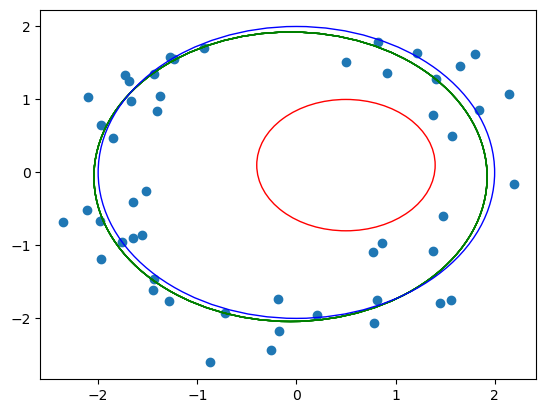

In [5]:
import matplotlib.pyplot as plt

def visualize(start, trajectory, step):
    plt.scatter(x, y)
    c_orig = plt.Circle((0, 0), 2, color="b", fill=False)
    c_start = plt.Circle((start[0], start[1]), start[2], color="r", fill=False)
    for i in range(0, len(trajectory), step):
        c_tmp = plt.Circle((trajectory[i][1], trajectory[i][1]), trajectory[i][2], color="g", fill=False)
        plt.gca().add_patch(c_tmp)
    plt.gca().add_patch(c_orig)
    plt.gca().add_patch(c_start)
    plt.show()

visualize((0.5, 0.1, 0.9), theta_history, 1)

In [6]:
#TODO: implement visualization of error history